# Regresión Lineal simple con scikit-learn
## Regresión lineal simple con scikit-learn
### 1. Importar paquetes y clases
El primer paso es importar el paquete numpy y la clase **LinearRegression** desde **sklearn.linear_model**:

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

### 2. Proporcionar datos
El segundo paso es definir los datos con los que trabajar. Las entradas (regresores, 𝑥) y la salida (respuesta, 𝑦) deben ser matrices u objetos similares. Esta es la forma más sencilla de proporcionar datos para la regresión:

In [ ]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

Ya tenemos las dos matrices: la entrada, **x** y la salida **y**. Debe llamar a la función **reshape()** a **x** porque esta matriz debe ser bidimensional, o más precisamente, debe tener una columna y tantas filas como sea necesario. Eso es exactamente lo que especifica el argumento (-1, 1) de **reshape()**.

In [ ]:
x

array([[ 5],
       [15],
       [25],
       [35],
       [45],
       [55]])

In [ ]:
x.shape

(6, 1)

In [ ]:
y

array([ 5, 20, 14, 32, 22, 38])

In [ ]:
y.shape

(6,)

Ahora podemos ver que **x** tiene dos dimensiones, mientras que **y** tiene una sola dimensión.

Veamos la distribución de los datos:

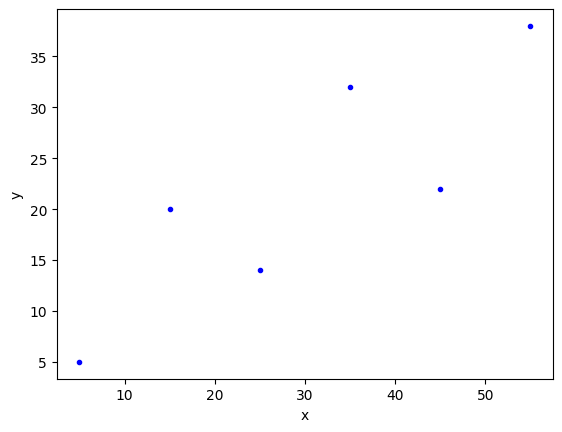

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, y, "b.")  # círculos azules
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 3. Crear un modelo y entrenarlo
El siguiente paso es crear un modelo de regresión lineal y entrenarlo utilizando los datos existentes.

Creamos una instancia de la clase **LinearRegression**, que representará el modelo de regresión:

In [ ]:
model = LinearRegression()

Esta declaración crea la variable **model** como una instancia de la clase **LinearRegression**. Puede proporcionar varios parámetros opcionales para LinearRegression:

* **fit_intercept**: es un booleano que, si True, decide calcular el intercepto 𝑏₀ o, si False, lo considera igual a cero. Por defecto es True.
* **copy_X**: es un booleano que decide si copiar (True) o sobrescribir las variables de entrada (False). Es True por defecto.
* **n_jobs**: es un número entero o None. Representa el número de trabajos utilizados en el cálculo paralelo. El valor predeterminado es None, que generalmente significa un trabajo. -1 significa utilizar todos los procesadores disponibles.
* **normalize**: es un booleano que, si True, decide normalizar las variables de entrada. El valor predeterminado es False, en cuyo caso no normaliza las variables de entrada.

La instancia **model** definida anteriormente utiliza los valores predeterminados de todos los parámetros.

Estos parámetros los podemos ver con el método **get_params()**:

In [ ]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

Ahora debemos aplicar la función **fit()** a **model**:

In [ ]:
model.fit(x, y)

LinearRegression()

Con **fit()**, calculas los valores óptimos de los pesos w y 𝑏, usando la entrada y la salida existentes, **x** e **y**, como argumentos. En otras palabras **fit()** entrena el modelo.

Veamos la recta que calculó el modelo:

In [ ]:
import pandas as pd

data = {'X': x.flatten(), 'Y': y.flatten()} # transformamos a nuestro conjunto de datos en un diccionario
df = pd.DataFrame(data)
df.head(10)

,X,Y
0,5,5
1,15,20
2,25,14
3,35,32
4,45,22
5,55,38


In [ ]:
# Predicción para el valor mínimo y máximo del conjunto de datos
# Calculamos los valor de Xmin y Xmax
X_min_max = np.array([[df["X"].min()], [df["X"].max()]])
# Predecimos los valores de Y para Xmin y Xmax
y_train_pred = model.predict(X_min_max)
print("Los valores de Xmin y Xmax son:", X_min_max)
print("Los valores de Y para Xmin y Xmax son:", y_train_pred)

Los valores de Xmin y Xmax son: [[ 5]
 [55]]
Los valores de Y para Xmin y Xmax son: [ 8.33333333 35.33333333]


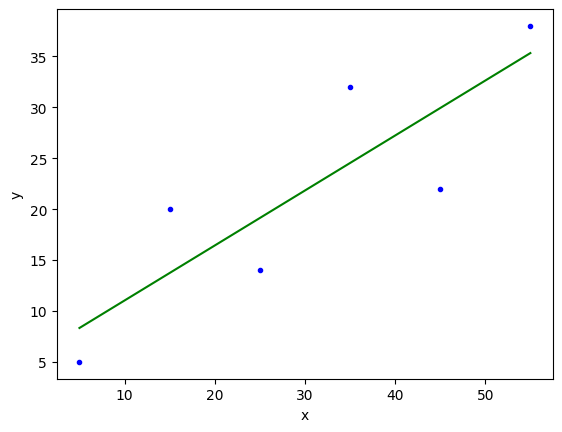

In [ ]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")  # estilo de linea solida verde
plt.plot(df['X'], df['Y'], "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 4. Calcular 𝑅²
Ya tenemos el modelo entrenado, ahora podemos calcular la métrica 𝑅² para saber si el modelo funciona satisfactoriamente.

Podemos calcular el coeficiente 𝑅², con **score()**:

In [ ]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


En la función **score()**, los argumentos son el predictor **x** y la respuesta **y** y el valor de retorno es 𝑅².

Los atributos de model son **intercept_**, que representa el coeficiente 𝑏₀, y **coef_**, que representa 𝑏₁:

In [ ]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 5.633333333333329
slope: [0.54]


Notar que *intercept_** es un escalar, mientras que **coef_** es una matriz.

**Not**: En scikit-learn, por convención , un guión bajo al final indica que se estima un atributo. En este ejemplo, **intercept_** y **coef_** son valores estimados.

Los valores de 𝑏₀ y w lo spodemos verificar visualmente en la recta que generó el modelo.
### 5. Predecir la respuesta
Una vez que tenga un modelo satisfactorio, puede usarlo para predicciones con datos existentes o nuevos. Para obtener la respuesta predicha, utilizamos **predict()**:

In [ ]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")
print(f"características de entrada x:\n{x}")

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
características de entrada x:
[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]


In [ ]:
df.head(10)  # recordemos los valores reales

,X,Y
0,5,5
1,15,20
2,25,14
3,35,32
4,45,22
5,55,38
